#Acciones de Doge-USD
##Instalamos las librerias



In [2]:
# necesitamos la libreria WIKITABLES para descargar tablas de Wikipedia (y mantener actualizada la data)
# Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
# Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas
#!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4 

##Importamos librerias

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Importamos el dataset

In [4]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/DerUwU/Deep-Learning/main/Trabajos/Movimientos%20Bursatiles/Databases/EURGBP.csv")
df_acciones.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-25,0.85343,0.86500,0.85300,0.85339,0.85339,0.0
1,2011-01-26,0.86510,0.86700,0.85990,0.86500,0.86500,0.0
2,2011-01-27,0.86077,0.86280,0.85816,0.86062,0.86062,0.0
3,2011-01-28,0.86150,0.86515,0.85920,0.86160,0.86160,0.0
4,2011-01-31,0.85750,0.86180,0.85580,0.85720,0.85720,0.0
5,2011-02-01,0.85550,0.85645,0.85080,0.85570,0.85570,0.0
6,2011-02-02,0.85680,0.85760,0.85120,0.85688,0.85688,0.0
7,2011-02-03,0.85230,0.85300,0.84380,0.85250,0.85250,0.0
8,2011-02-04,0.84440,0.84740,0.84220,0.84430,0.84430,0.0
9,2011-02-07,0.84294,0.84452,0.83870,0.84300,0.84300,0.0


##Conociendo y preprocesando los datos

In [5]:
#df.describe()
df_acciones.isnull().sum()

Date          0
Open         23
High         23
Low          23
Close        23
Adj Close    23
Volume       23
dtype: int64

##Eliminamos las filas vacias
Se eliminan los datos vacios (NA) y se resetea el indice

In [6]:
df_acciones = df_acciones.dropna()   # Se eliminan filas que tengan valor NaN.
df_acciones = df_acciones.reset_index(drop=True)

##Cambiamos el tipo de dato en las columnas


In [7]:
df_acciones['Date']=pd.to_datetime(df_acciones['Date'])       # Convertimos el campo DATE en tipo fecha
##df_acciones = df_acciones.rename(columns={'Name':'symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_acciones.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-25,0.85343,0.86500,0.85300,0.85339,0.85339,0.0
1,2011-01-26,0.86510,0.86700,0.85990,0.86500,0.86500,0.0
2,2011-01-27,0.86077,0.86280,0.85816,0.86062,0.86062,0.0
3,2011-01-28,0.86150,0.86515,0.85920,0.86160,0.86160,0.0
4,2011-01-31,0.85750,0.86180,0.85580,0.85720,0.85720,0.0


##Definimos las columnas que se usaran

In [11]:
open_table = df_acciones[['Date', 'Open']]
open_table.head()

,Date,Open
0,2011-01-25,0.85343
1,2011-01-26,0.86510
2,2011-01-27,0.86077
3,2011-01-28,0.86150
4,2011-01-31,0.85750


In [12]:
close_table = df_acciones[['Date', 'Close']]
close_table.head()

,Date,Close
0,2011-01-25,0.85339
1,2011-01-26,0.86500
2,2011-01-27,0.86062
3,2011-01-28,0.86160
4,2011-01-31,0.85720


##Invertimos el dataframe para tener las acciones por fecha 

In [10]:
##NO CORRER
#colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda
open_table = open_table.pivot(index='Date', columns='Open', values='Open')
open_table = open_table.dropna(axis=1)    #borramos filas vacias
open_table.head(5)

Open
Date
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-31


##Normalización de los datos usando como base la fecha

---
Puede decidir volver a muestrear los datos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [13]:
open_table['Date'] = pd.to_datetime(open_table['Date'])
close_table['Date'] = pd.to_datetime(close_table['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
open_table = open_table.resample('W', on='Date').sum()
close_table = close_table.resample('W', on='Date').sum()

##Graficamos los datos

In [15]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def plot_stock(symbol, df_acciones=df_acciones):
    df_acciones[symbol].plot(alpha=2);

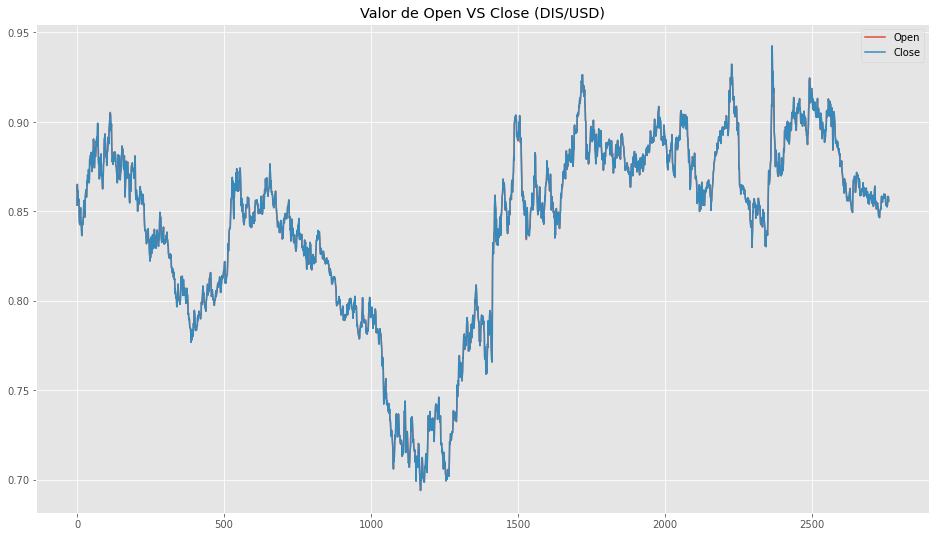

In [16]:
plot_stock('Open')
plot_stock('Close')
plt.title('Valor de Open VS Close (DIS/USD)')
plt.legend();

##Grafica elbow o de codo

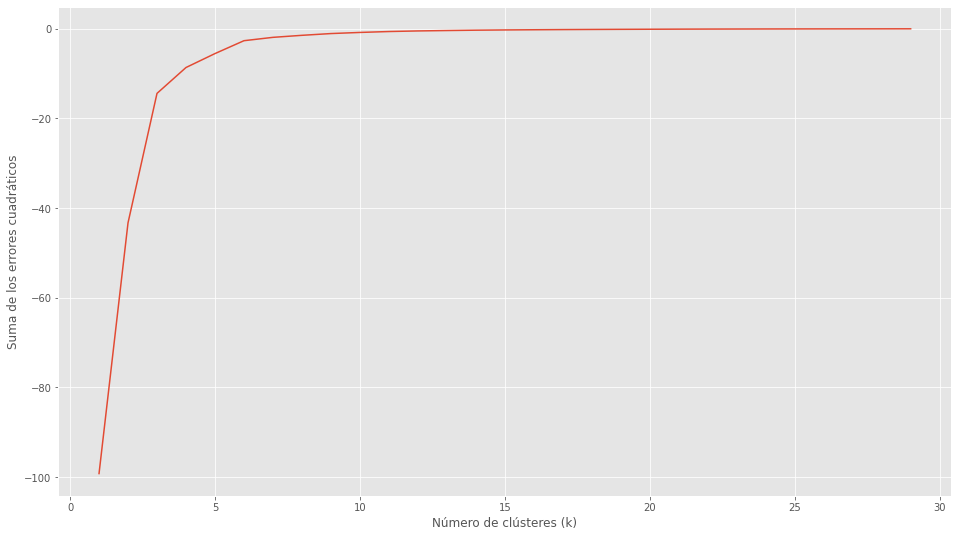

In [17]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(open_table).score(open_table) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

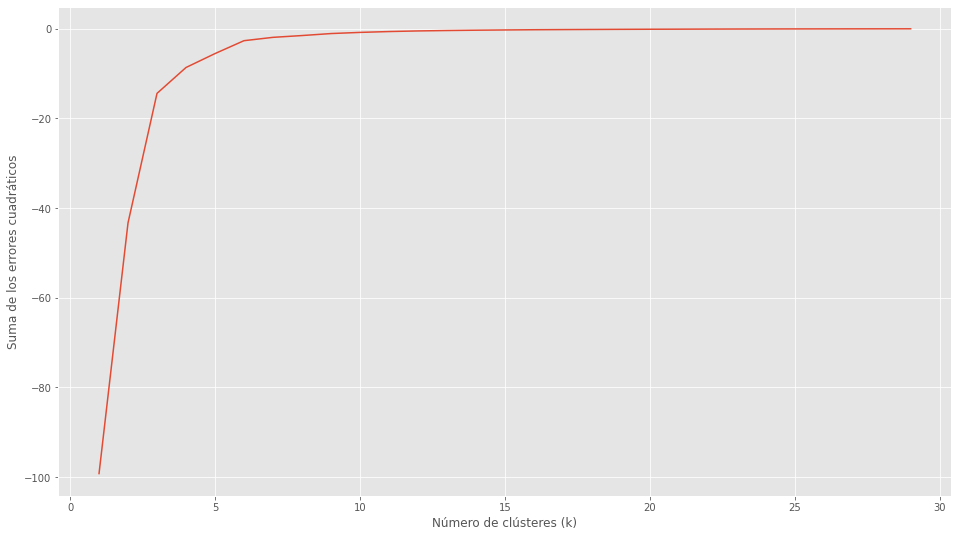

In [18]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(close_table).score(close_table) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

##Aplicar el algoritmo de K-mean

In [19]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(open_table)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[4.44462425]
 [3.59527411]
 [0.4479    ]
 [3.96916929]
 [4.24661927]]


In [20]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(close_table)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[3.96910798]
 [4.24609044]
 [0.447995  ]
 [4.44408325]
 [3.59525875]]
